<a href="https://colab.research.google.com/github/Grover1204/Wild-Fire-Prediction/blob/main/Wild_Fire_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install the Kaggle API Python package
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"grover009","key":"df213bc82f83cd181a0574088199381d"}'}

In [ ]:
# Create a directory for the API credentials
!mkdir ~/.kaggle

# Copy the API credentials to the directory
!cp kaggle.json ~/.kaggle/

# Set the file permissions for the credentials file
!chmod 600 ~/.kaggle/kaggle.json

# List the available datasets to test if the API is properly configured
!kaggle datasets list

ref                                                                 title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/global-youtube-statistics-2023                     Global YouTube Statistics 2023                       60KB  2023-07-28 15:36:38           7492        245  1.0              
joebeachcapital/world-happiness-report-2013-2023                    World Happiness Reports 2013-2023                    93KB  2023-08-15 01:09:41            692         25  1.0              
nagrajdesai/latest-10000-movies-dataset-from-tmdb                   Latest 10000 Movies Dataset from TMDB                 1MB  2023-08-17 04:45:36            681         31  1.0              
nelgiriyewithana/countries-of-the-world-

In [ ]:
! kaggle datasets download -d abdelghaniaaba/wildfire-prediction-dataset

100% 1.44G/1.45G [00:20<00:00, 64.4MB/s]
100% 1.45G/1.45G [00:20<00:00, 77.2MB/s]


In [ ]:
! unzip wildfire-prediction-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: valid/nowildfire/-73.465183,45.443641.jpg  
  inflating: valid/nowildfire/-73.465388,45.584881.jpg  
  inflating: valid/nowildfire/-73.469451,45.480331.jpg  
  inflating: valid/nowildfire/-73.471252,45.51974.jpg  
  inflating: valid/nowildfire/-73.472693,45.427766.jpg  
  inflating: valid/nowildfire/-73.473015,45.435254.jpg  
  inflating: valid/nowildfire/-73.475051,45.56612.jpg  
  inflating: valid/nowildfire/-73.477079,45.597274.jpg  
  inflating: valid/nowildfire/-73.478813,45.555686.jpg  
  inflating: valid/nowildfire/-73.479478,45.524618.jpg  
  inflating: valid/nowildfire/-73.480135,45.528248.jpg  
  inflating: valid/nowildfire/-73.480722,45.518864.jpg  
  inflating: valid/nowildfire/-73.481149,45.563113.jpg  
  inflating: valid/nowildfire/-73.481422,45.559789.jpg  
  inflating: valid/nowildfire/-73.481565,45.467244.jpg  
  inflating: valid/nowildfire/-73.483407,45.637554.jpg  
  inflating: valid/nowildfire/-73.48589

In [ ]:
from pathlib import Path

In [ ]:
train_dir = Path('/content/train/')
test_dir=Path('/content/test')
val_dir=Path('/content/valid')

In [ ]:
import os
from PIL import Image

# Function to load images from a directory
def load_images_from_folder(folder):
    images_wildfire = []
    images_non_wildfire = []
    for filename in os.listdir(os.path.join(folder, 'wildfire')):
        img = Image.open(os.path.join(folder, 'wildfire', filename))
        if img is not None:
            images_wildfire.append(img)

    for filename in os.listdir(os.path.join(folder, 'nowildfire')):
        img = Image.open(os.path.join(folder, 'nowildfire', filename))
        if img is not None:
            images_non_wildfire.append(img)

    return images_wildfire, images_non_wildfire

# Load images from the train, test, and validation directories
train_wildfire_images, train_non_wildfire_images = load_images_from_folder(train_dir)
test_wildfire_images, test_non_wildfire_images = load_images_from_folder(test_dir)
val_wildfire_images, val_non_wildfire_images = load_images_from_folder(val_dir)


In [ ]:
len(train_wildfire_images)

15750

In [ ]:
len(train_non_wildfire_images)

14500

In [ ]:
len(test_wildfire_images)

3480

In [ ]:
len(test_non_wildfire_images)

2820

In [ ]:
len(val_wildfire_images)

3480

In [ ]:
len(val_non_wildfire_images)

2820

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot 10 random images
def plot_images(images, title):
    plt.figure(figsize=(20,10))
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(images[i])
        plt.title(title)
        plt.axis('off')
    plt.show()

# Generate 10 random indices
rand_indices = np.random.randint(0, len(train_non_wildfire_images), size=10)

# Select 10 random images from train_wildfire_images and train_non_wildfire_images
rand_wildfire_images = [train_wildfire_images[i] for i in rand_indices]
rand_non_wildfire_images = [train_non_wildfire_images[i] for i in rand_indices]




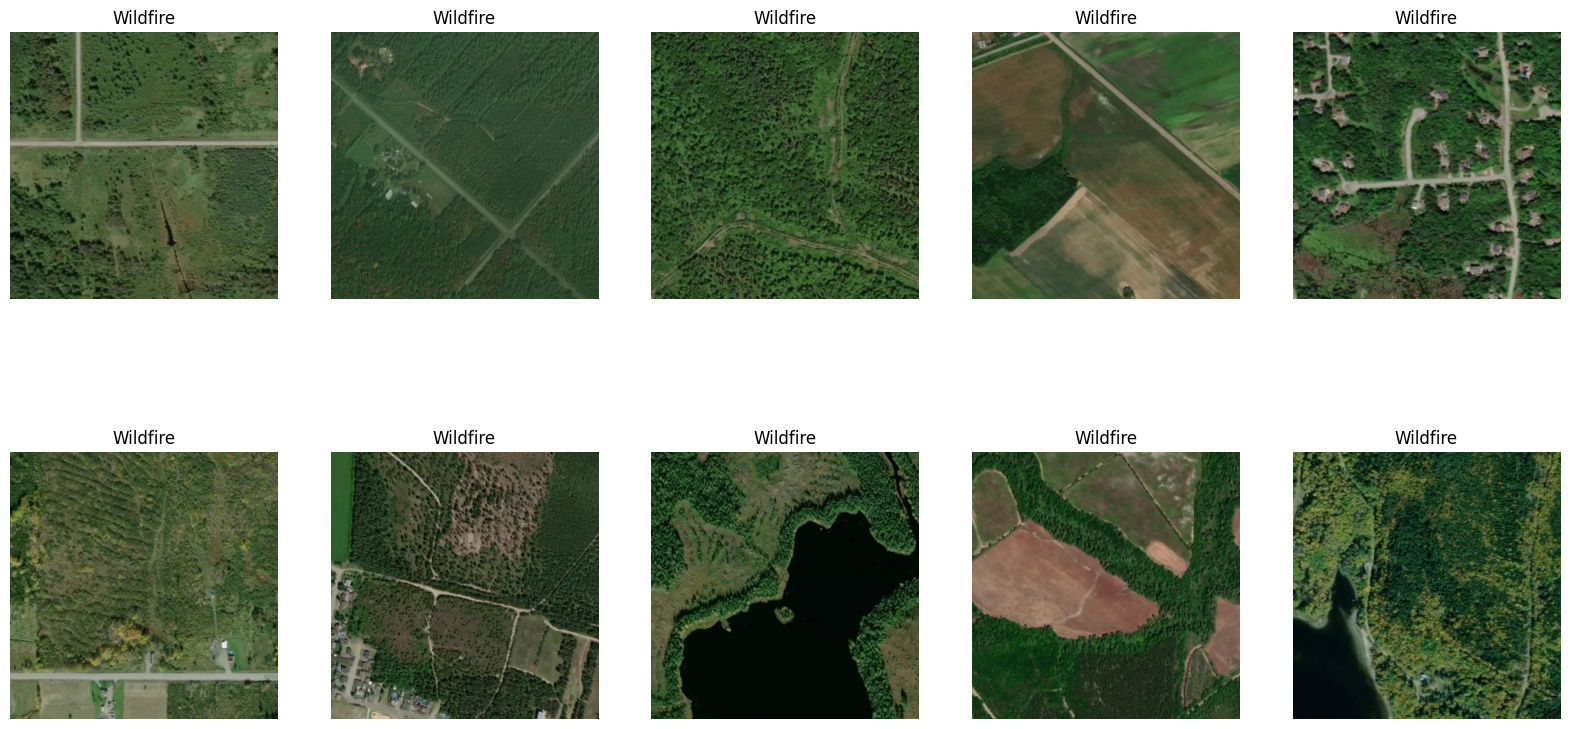

In [ ]:
# Plot the images
plot_images(rand_wildfire_images, 'Wildfire')

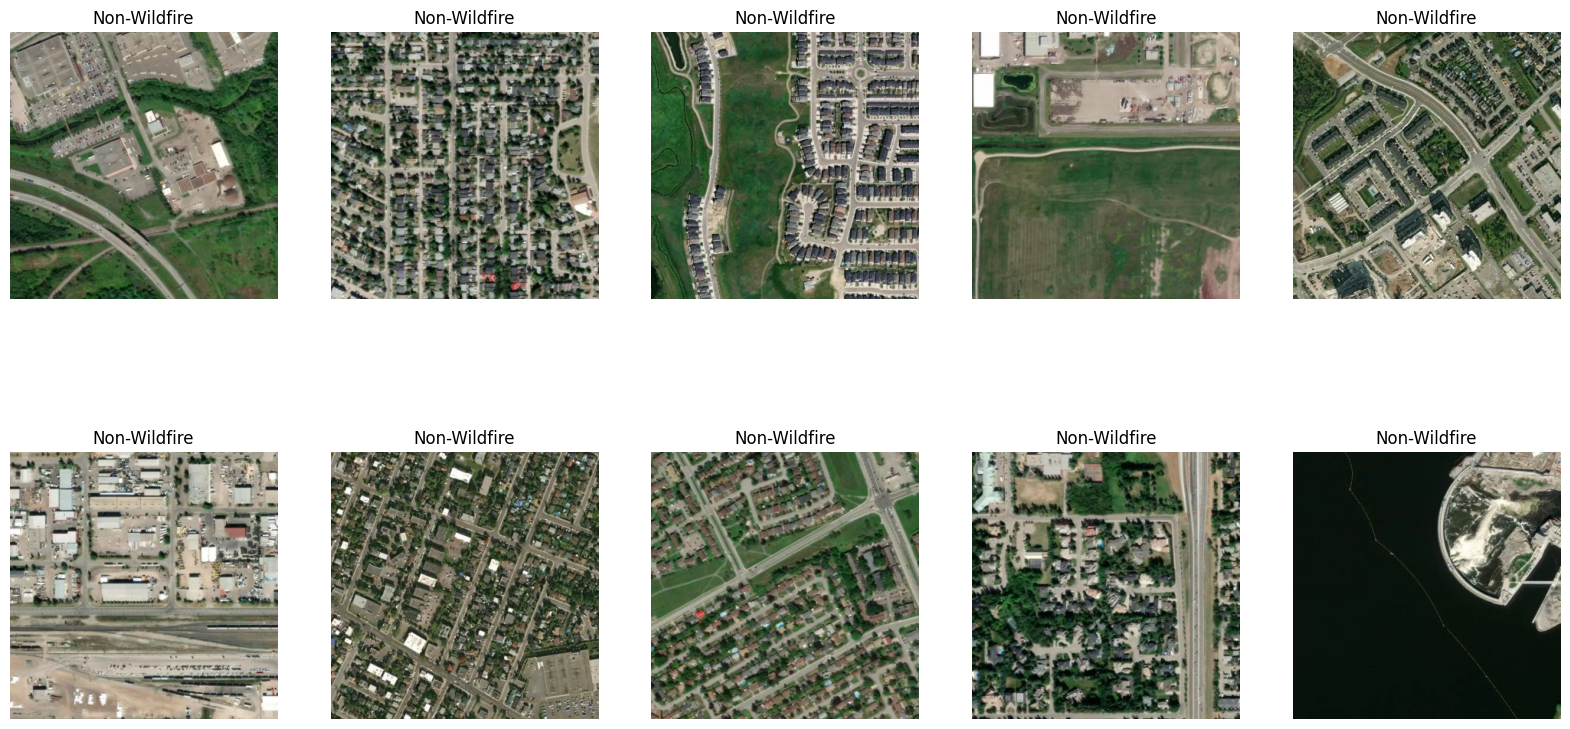

In [ ]:
plot_images(rand_non_wildfire_images, 'Non-Wildfire')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Specify the dimensions to resize images to
IMG_WIDTH, IMG_HEIGHT = 128, 128

# Specify batch size
batch_size = 32

# Create an ImageDataGenerator object
datagen = ImageDataGenerator(rescale=1./255)  # Normalize to [0,1]

# Create generators for training, testing, and validation datasets
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=batch_size,
    class_mode='binary'  # for binary classification problem
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=batch_size,
    class_mode='binary'  # for binary classification problem
)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=batch_size,
    class_mode='binary'  # for binary classification problem
)


Found 30250 images belonging to 2 classes.
Found 6300 images belonging to 2 classes.
Found 6300 images belonging to 2 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # Use 'sigmoid' activation for binary classification

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D

# Load the VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully-connected layer
x = Dense(1024, activation='relu')(x)

# Add a logistic layer with 1 class (binary classification)
predictions = Dense(1, activation='sigmoid')(x)

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# First: train only the top layers (which were randomly initialized)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Train the model and save the history
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_generator,
    validation_steps=50)


Epoch 1/10
100/100 [==============================] - 663s 7s/step - loss: 0.2652 - accuracy: 0.8944 - val_loss: 0.2120 - val_accuracy: 0.9181
Epoch 2/10
100/100 [==============================] - 608s 6s/step - loss: 0.2245 - accuracy: 0.9094 - val_loss: 0.1704 - val_accuracy: 0.9344
Epoch 3/10
100/100 [==============================] - 608s 6s/step - loss: 0.1996 - accuracy: 0.9219 - val_loss: 0.1943 - val_accuracy: 0.9262
Epoch 4/10
100/100 [==============================] - 604s 6s/step - loss: 0.1904 - accuracy: 0.9308 - val_loss: 0.1676 - val_accuracy: 0.9388
Epoch 5/10
100/100 [==============================] - 605s 6s/step - loss: 0.1919 - accuracy: 0.9275 - val_loss: 0.2287 - val_accuracy: 0.9094
Epoch 6/10
100/100 [==============================] - 606s 6s/step - loss: 0.1818 - accuracy: 0.9334 - val_loss: 0.1733 - val_accuracy: 0.9362
Epoch 7/10
100/100 [==============================] - 604s 6s/step - loss: 0.1755 - accuracy: 0.9294 - val_loss: 0.1701 - val_accuracy: 0.9356

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

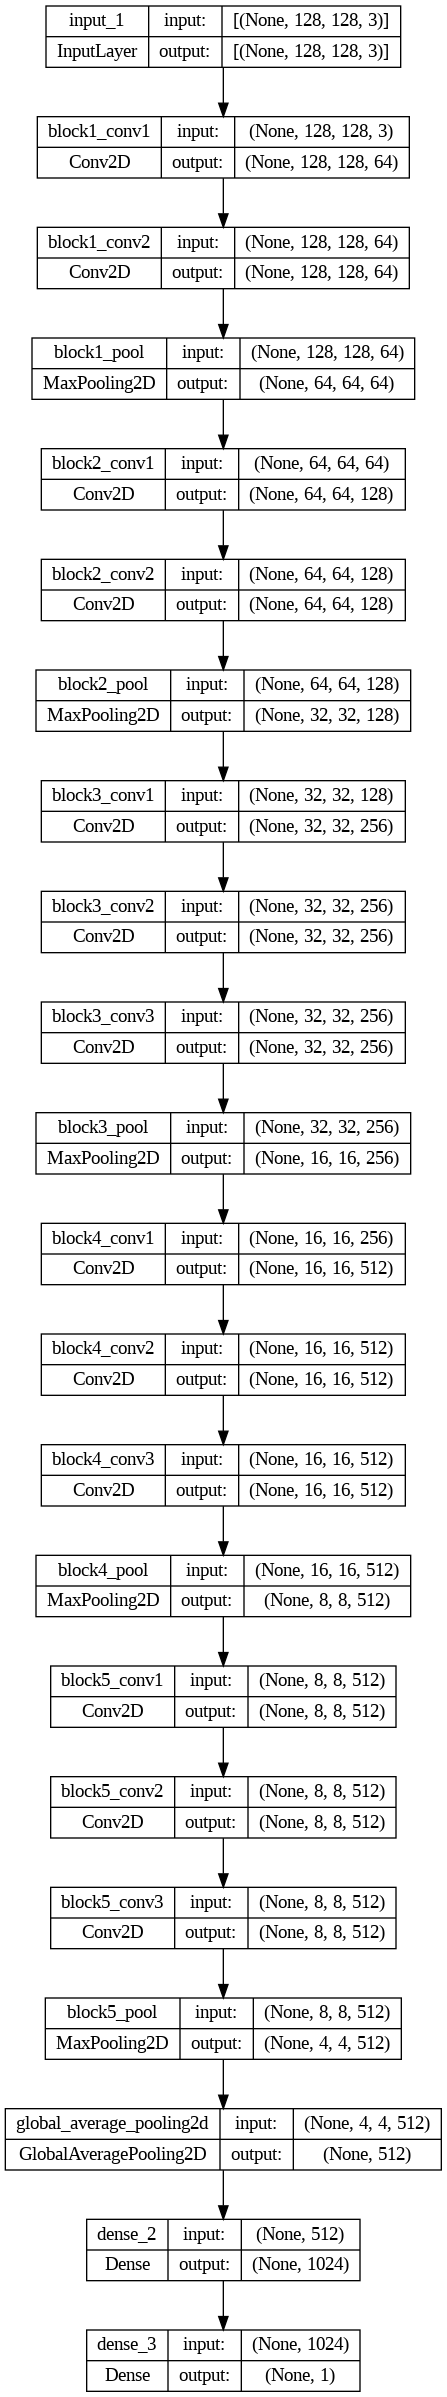

In [ ]:
# Plot the model summary
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_summary.png', show_shapes=True)

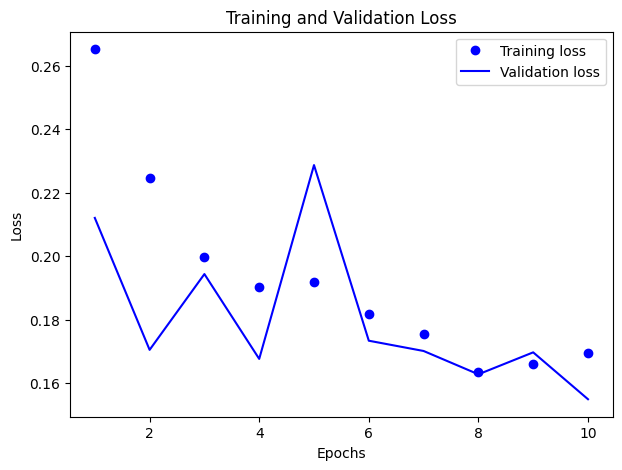

In [ ]:
import matplotlib.pyplot as plt

# Extract loss and accuracy values from the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(7, 5))
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()




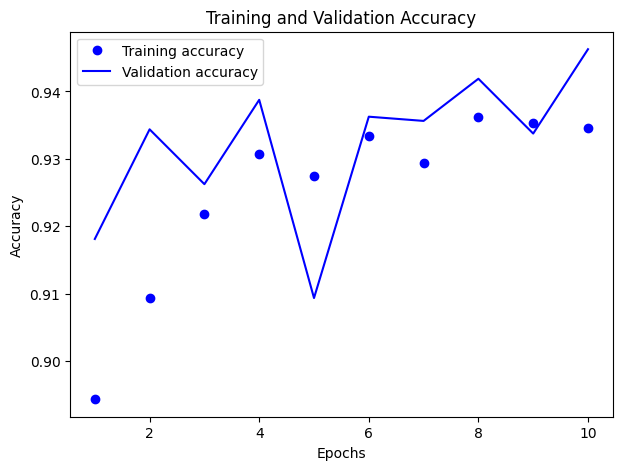

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(7, 5))
plt.plot(epochs, train_accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

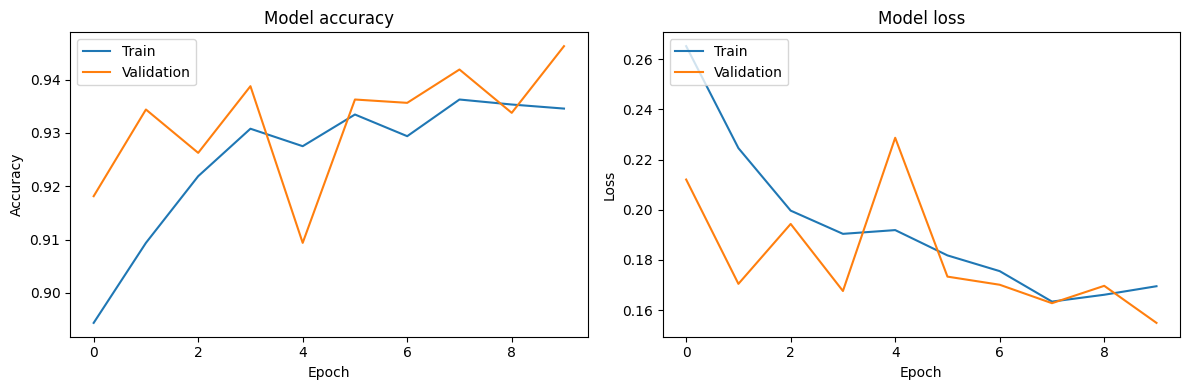

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

197/197 [==============================] - 795s 4s/step


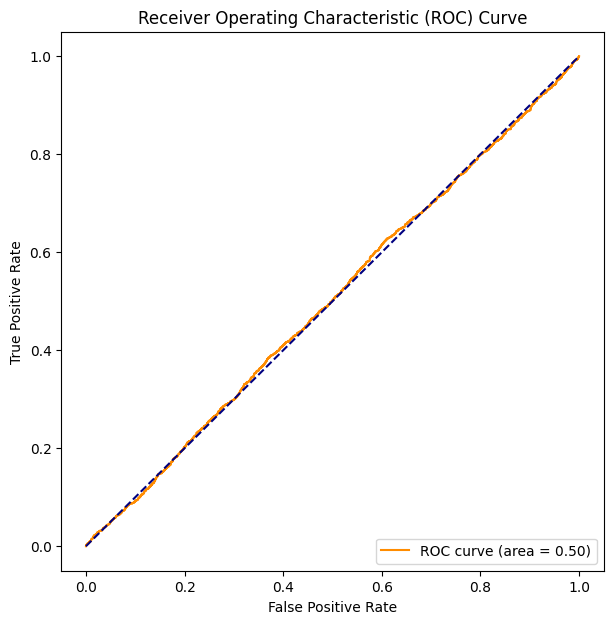

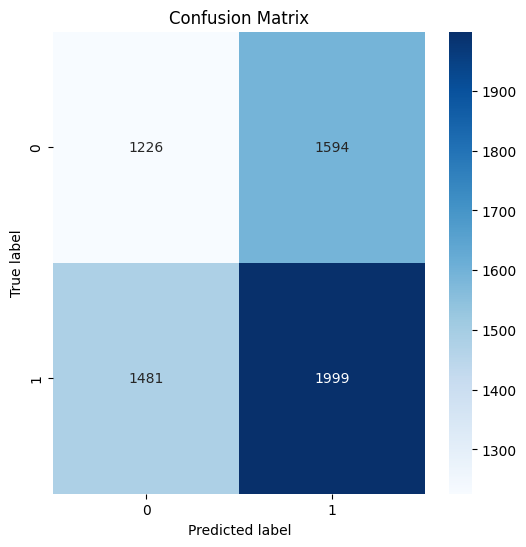

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import seaborn as sns

# Predict probabilities for the validation data
y_pred_probs = model.predict(val_generator, verbose=1)
y_pred = np.where(y_pred_probs > 0.5, 1, 0)

# Get true labels from the validation generator
y_true = val_generator.classes

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()




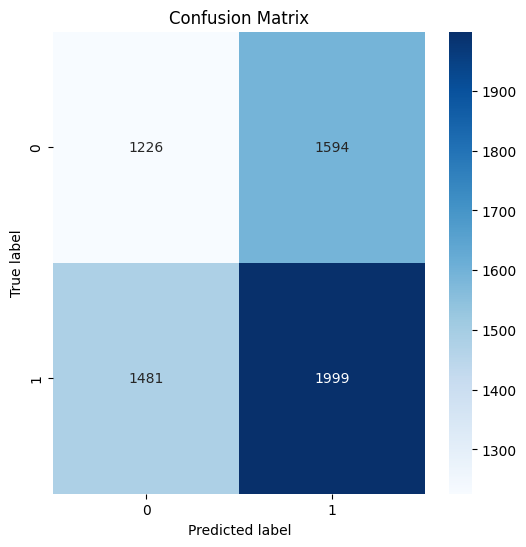

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Predict probabilities for the validation data
y_pred_probs = model.predict(val_generator, verbose=1)
y_pred = np.where(y_pred_probs > 0.5, 1, 0)

# Get true labels from the validation generator
y_true = val_generator.classes

# Compute metrics
val_loss, val_accuracy = model.evaluate(val_generator, verbose=0)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
auc = roc_auc_score(y_true, y_pred_probs)

metrics_data = {
    'Validation Loss': val_loss,
    'Validation Accuracy': val_accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'AUC': auc
}


197/197 [==============================] - 793s 4s/step


In [ ]:
import pandas as pd

# Create a dataframe from the metrics data
df_metrics = pd.DataFrame.from_dict(metrics_data, orient='index', columns=['Value'])
print(df_metrics)


                        Value
Validation Loss      0.143412
Validation Accuracy  0.948095
Precision            0.558864
Recall               0.577011
F1 Score             0.567793
AUC                  0.506045


In [ ]:
# Count images in each folder
def count_images(folder, category):
    return len(os.listdir(os.path.join(folder, category)))

# Count images for each category in the train, test, and validation sets
train_wildfire_count = count_images(train_dir, 'wildfire')
train_nowildfire_count = count_images(train_dir, 'nowildfire')

test_wildfire_count = count_images(test_dir, 'wildfire')
test_nowildfire_count = count_images(test_dir, 'nowildfire')

val_wildfire_count = count_images(val_dir, 'wildfire')
val_nowildfire_count = count_images(val_dir, 'nowildfire')


In [ ]:
print(test_nowildfire_count)

2820


In [ ]:
# Save the model
model.save('my_model.h5')


In [ ]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('my_model.h5')


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     